In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [4]:
from glob import glob
Path="G:\\Rotten Fruit Model\\train\\*"
Folders=glob(Path)
Folders

['G:\\Rotten Fruit Model\\train\\freshapples',
 'G:\\Rotten Fruit Model\\train\\freshbanana',
 'G:\\Rotten Fruit Model\\train\\freshoranges',
 'G:\\Rotten Fruit Model\\train\\rottenapples',
 'G:\\Rotten Fruit Model\\train\\rottenbanana',
 'G:\\Rotten Fruit Model\\train\\rottenoranges']

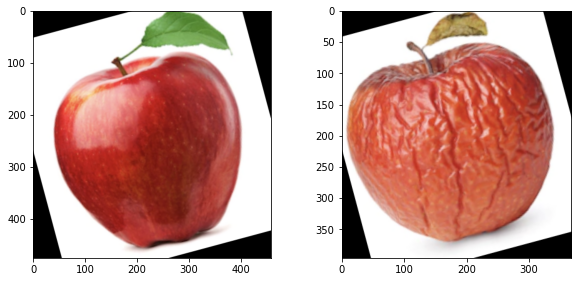

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
random_images=glob("G:\\Rotten Fruit Model\\train\\freshapples\\*")
images=[i.split("\\")[4] for i in random_images]
img_dir = Folders[0]
img = plt.imread(os.path.join(img_dir,images[0]))
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
random_images=glob("G:\\Rotten Fruit Model\\train\\rottenapples\\*")
images=[i.split("\\")[4] for i in random_images]
img_dir = Folders[3]
img = plt.imread(os.path.join(img_dir,images[0]))
plt.imshow(img, cmap='gray')


plt.show()

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_gen = train_datagen.flow_from_directory("G:\\Rotten Fruit Model\\train\\",
                                              target_size=(150,150),
                                              class_mode='categorical',
                                              batch_size=126)
test_gen = test_datagen.flow_from_directory("G:\\Rotten Fruit Model\\test\\",
                                            target_size=(150,150),
                                            class_mode='categorical',
                                            batch_size=126)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', 
                                 input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(2, 2))  
model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [7]:
# model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# history = model.fit(train_gen, epochs=25, steps_per_epoch=20, validation_data = test_gen, verbose = 1, validation_steps=10)

In [1]:
from keras.models import load_model
model = load_model('Fresh-Rotten.h5')

In [2]:
from keras.preprocessing import image
from IPython.display import Image, display
import numpy as np

def Predict_Fruit(Input_Image):
    img = image.load_img(Input_Image, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    img = plt.imread(Input_Image)
    plt.imshow(img, cmap='gray')
    
    classes = model.predict(images, batch_size=10)
    if classes[0][0]==1:
        Output='Fresh Apple'
    elif classes[0][1]==1:
        Output='Fresh Banana'
    elif classes[0][2]==1:
        Output='Fresh Orange'
    elif classes[0][3]==1:
        Output='Rotten Apple'
    elif classes[0][4]==1:
        Output='Rotten Banana'
    elif classes[0][5]==1:
        Output='Rotten Orange'
    
    return Output

'Rotten Apple'

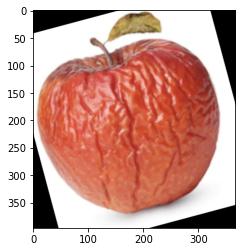

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


Input_images=glob("G:\\Rotten Fruit Model\\train\\rottenapples\\*")
Predict_Fruit(Input_images[0])